<b>The colour-magnitude diagramme</b>

One important tool in astrophysics is the Hertzsprung–Russell (HR) diagramme, in which we plot the luminosity of a star as a function of its surface (or "effective") temperature. In practice, we use a logarithm-logarithm plot, as the ranges covered are rather large (10 orders of magnitudes in luminosity, 2 in temperature). Such diagrammes have proved very useful, as it was seen that the majority of stars (including the Sun) follow a line called the "main sequence", while others will occupy different regions in the diagramme, corresponding to giant stars, horizontal-branch stars or white dwarfs, for example.

In principle, we do not know necessarily the temperature (which is obtained mostly with spectroscopy) nor the total luminosity (as we would need to observe it at all wavelength) of a star and so a different diagramme, the colour-magnitude diagramme (CMD), is used as a proxy. 

In astronomy, for historical reasons, we use magnitude in a different way as in other part of physics. Indeed, the Greek astronomer Hipparchus of Nicaea devised a numerical scale to describe the brightness of stars as seen with the unaided eye: the brightest star in the sky was assigned an apparent magnitude of 1, and the dimmest star visible assigned a value of 6. The difference between them corresponds roughly to a factor of 100 in brightness. Thus, as 5 magnitudes correspond to a factor 100, the magnitude is given as -2.5 times the logarithm of the brightness in a given wavelength range. Because of the minus sign, a star is brighter the smaller (or more negative) its magnitude is, as devised by Hipparchus.

We also use two kinds of magnitude - the apparent (or observed) magnitude as described above and the absolute one. The apparent one tells us how we perceive the star as seen from Earth. However, a star can be close or far, and thus its intrinsic luminosity may be very different. This is taken into account into the absolute magnitude, which takes the distance into account. The later is thus a good proxy for the total luminosity of the star. Thus, the brightest star in the night sky, Sirius, has an observed magnitude of -1.46 because it is so close to us, but an absolute magnitude of 1.4. By comparison, one of the intrinsically brightest stars in our Galaxy, Eta Carinae, has an absolute magnitude of -8.6 (it is thus intrinsically 10,000 times brighter than Sirius), but an apparent magnitude of 4.3 (so it seems to us , as it is much farther away.

The apparent magnitude of a given band, for example in the visible, is given by 
V = -2.5 log F<sub>V</sub> + C<sub>V</sub>,
where C<sub>V</sub> is a constant and F<sub>V</sub> is the observed flux of the star in this band.
To determine the absolute magnitude, we need to take into account the distance, as well as the fact that the flux of the star is dimmed by all the matter and dust that lies between the star and us (the "extinction"). By definition, an object's absolute magnitude is defined to be equal to the apparent magnitude that the object would have if it were viewed from a distance of exactly 10 parsecs (32.6 light-years), without extinction. 
M<sub>V</sub> = -2.5 log (F<sub>V</sub> * d<sub>10</sub><sup>2</sup>) + C<sub>V</sub> + A<sub>V</sub>, 
where d<sub>10</sub> is the distance of the star, in units of 10 parsecs, d<sub>10</sub>= d / 10 pc, with d expressed in parsec, and A<sub>V</sub> is the extinction.

Thus,
M<sub>V</sub> = -2.5 log F<sub>V</sub> - 5 log d<sub>10</sub> + C<sub>V</sub> + A<sub>V</sub> = V - 5 (log d - 1.) + A<sub>V</sub> = V + 5 - 5 log d + A<sub>V</sub>. 
As the distance is often expressed in kilo-parsecs (kpc), i.e. 1000 pc, this is then rewritten
M<sub>V</sub> = V - 10 - 5 log d<sup>*</sup> + A<sub>V</sub>.
Using the parallax, varpi, in milli-arcseconds, instead, we have
M<sub>V</sub> = V - 10 + 5 log varpi + A<sub>V</sub>, as varpi = 1./d<sup>*</sup>.
Instead of looking into the V band, we can also look in any other band, and the same relation exists.

One can use such absolute magnitude as a proxy for the total luminosity of a star. What about the temperature? We know that stars of different temperatures have different colours: the hotter stars are bluer, while the Sun with a surface temperature of about 5,800 K is yellow, and cooler stars are red. Such a colour can also be seen as the difference between the magnitude obtained in two different bands, a blue and a red one. Thus, if a star is bluer, its magnitude in the blue band will be smaller than in the red band, and the difference between the two magnitudes will be negative. The opposite is true for a red star. 

The Gaia satellite provides photometric observations in three bands: the G band, which is very wide, and in the blue (Bp) and in the red (Rp). One can thus create a colour-magnitude diagramme using Bp-Rp as the colour and an absolute magnitude based on the magnitude in G.
One needs to also correct these magnitudes for the extinction. This is done with:
A_G = 0.86117 * Av
A_Bp = 1.06126 * Av
A_Rp = 0.64753 * Av

Let us for example look at the <a href="./cmd_M7.jpg">CMD</a> for the open cluster Messier 7. As this is a cluster, it is defined by a single age and chemical composition and is thus representing a single population.

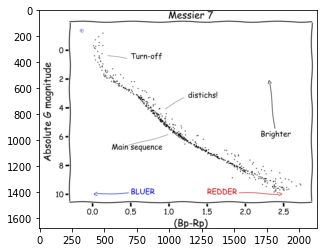

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img=mpimg.imread('./cmd_M7.png')
imgplot = plt.imshow(img,interpolation ='bilinear')

The main sequence is clearly visible, as well as the "turn-off", which is the highest stars that are still on the main sequence for the age of the cluster. The life of a star is shorter the more massive it is, so as a cluster ages, his more massive stars will evolve and leave the main sequence. Thus, there is a maximum mass that one can see for a given age of a cluster. There is one star, however, which seems to be above this - it is surrounded by a blue circle - and is called a Blue Straggler Star. You can read more about it in <a href="http://eso.org/~hboffin/enquirer3.pdf">this paper</a>. 
In the CMD of Messier 7, we also see some stars that are above the main sequence. These are districhs (or binaries), i.e. they are composed of to stars - the companion is adding some flux and makes the whole system redder (do you see why?), hence, moves it above the main sequence.

<b>The CMD of the question mark stars</b>

So, what about the position in the CMD for the planetary nebula and for the stars that form the conundrum? 
In the paper, we showed that they seem to be all at the same distance. This was based on the Gaia DR2 dataset, which is less precise that the newest Gaia EDR3. Let's see what we have now.

As we saw in <a href="gaia_glyph.ipynb">this notebook</a>, the parallax are not precise enough to be able to directly obtain the distances from them. So, we will use the photo-geometric distances instead.

We need to get the magnitudes in the three bands and the distance. 
We also need to estimate the errors on these. In the Gaia archive, we have the inverse of the relative errors on the flux in the various bands, not on the magnitude, so we need to convert this. This is done with
m = -2.5 log F + c
dm = |2.5 dF/F / ln(10.)|,
where dF/F is exactly the relative error.

One needs also to take the extinction into account, which is about Av=2.35 (i.e. almost a factor 10 in extinction!) for this region. One can check this using dust maps for example.

I also compare the resulting data points with PARSEC isochrones (<a href="http://stev.oapd.inaf.it/cmd">http://stev.oapd.inaf.it/cmd</a>) for two different metallicities and two ages.  

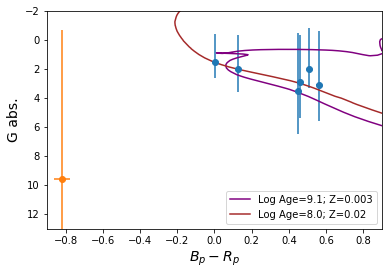

In [70]:
import pandas as pd
import numpy as np
from scipy import stats

def read_and_error(file):
    stars = pd.read_csv(file)
    stars_G = stars['phot_g_mean_mag']
    stars_Bp = stars['phot_bp_mean_mag']
    stars_Rp = stars['phot_rp_mean_mag']
    
    Av = 2.35   # This is the estimated extinction in this region
    Ag = 0.86117 * Av
    Abp = 1.06126 * Av
    Arp = 0.64753 * Av
    stars_Bp = stars_Bp - Abp 
    stars_Rp = stars_Rp - Arp
    stars_G = stars_G - Ag

    stars_error_G = 2.5 / stars['phot_g_mean_flux_over_error'] / np.log(10.)
    stars_error_Bp = 2.5 / stars['phot_bp_mean_flux_over_error'] / np.log(10.)
    stars_error_Rp = 2.5 / stars['phot_rp_mean_flux_over_error'] / np.log(10.)
    
    stars_rpgeo = stars['rpgeo']
    stars_rpgeo_low = stars['b_rpgeo_x']
    stars_rpgeo_up = stars['B_rpgeo_xa']
    
    stars_colour = stars_Bp - stars_Rp
    stars_error_colour = np.sqrt( stars_error_Bp**2. + stars_error_Rp**2. )
    stars_absG = stars_G + 5 - 5 * np.log10(stars_rpgeo) 
    stars_absG_low = stars_G - stars_error_G + 5 - 5 * np.log10(stars_rpgeo_low)
    stars_absG_up = stars_G + stars_error_G + 5 - 5 * np.log10(stars_rpgeo_up)
    
    plt.errorbar(stars_colour,stars_absG,xerr=stars_error_colour,yerr=[stars_absG_low,stars_absG_up],marker='o',linestyle='None')
    
    
file1 = './stars_eDR3_dis.csv'
read_and_error(file1)

file2 = './hen237_dis.csv'
read_and_error(file2)

# Reading the PARSEC isochrone file
file ='./iso.dat'
Z, la, m, l, Gm, Bp, Rp = np.loadtxt(file,usecols=(0,2,5,9,25,26,28),unpack=True)

colors = ['purple','brown','blue','blue','g','r']

metalkeep = 0.0027383   # a metal-poor isochrone of 1.26 Gyr
agekeep = 9.10000

cond = np.logical_and(la == agekeep, Z == metalkeep)
Gmm = Gm[cond]
BRp = Bp[cond] - Rp[cond]

plt.plot(BRp, Gmm, c=colors[0],label='Log Age=9.1; Z=0.003')

metalkeep = 0.020322    # a metal-rich isochrone of 100 Myr
agekeep = 8.00000

cond = np.logical_and(la == agekeep, Z == metalkeep)
Gmm = Gm[cond]
BRp = Bp[cond] - Rp[cond]

plt.plot(BRp, Gmm, c=colors[1],label='Log Age=8.0; Z=0.02')

plt.xlim(-0.9,0.9)
plt.ylim(13.,-2.)
plt.xlabel(r'$B_p-R_p$',fontsize=14)
plt.ylabel('G abs.',fontsize=14)
plt.legend(loc='lower right');


So, we can see that because of the large errors on the distance, it is very difficult to say anything about the positions of the stars from the eroteme in the CMD. The error on the distance of the planetary nebula is also very large, but it appears that the central star is much bluer than the other (which makes sense as it is a hot core of a star) and it occupies in the CMD the position of stars that become white dwarfs.